In [99]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Python을 이용한 통계 분석
- 기술통계, 확률분포, 분포에 관한 추론: 실제 분석에서 많이 쓰이는 개념 중심으로 설명

## 1. MovieLens 자료의 기술통계

In [100]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 컬럼명 생성하기
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

# 데이터 불러오기 
data = pd.read_csv('data.csv')
movies = pd.read_csv('movies.dat', sep = '::', header = None, names = mnames)
users = pd.read_csv('users.dat', sep = '::', header = None, names = unames)
movies.head()

C:\Users\yuniv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\yuniv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### 1.1. 자료 중 가장 많이 평가된 자료의 평점 분포

In [101]:
movie_counts = data['title'].value_counts().sort_values(ascending = False)
print('가장 많이 평가된 영화: ', movie_counts.index[0])

가장 많이 평가된 영화:  American Beauty (1999)


In [102]:
# 가장 많이 평가된 영화인 American Beauty 평가 내역만 추출 (인덱스 리셋 = 랜덤)
sub_data = data.loc[data.title == movie_counts.index[0]].reset_index()
sub_data.head()

,index,Unnamed: 0,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,107009,107009,2,2858,4,978298434,M,56,16,70072,American Beauty (1999),Comedy|Drama
1,107010,107010,3,2858,4,978297039,M,25,15,55117,American Beauty (1999),Comedy|Drama
2,107011,107011,5,2858,4,978241390,M,25,20,55455,American Beauty (1999),Comedy|Drama
3,107012,107012,6,2858,1,978236809,F,50,9,55117,American Beauty (1999),Comedy|Drama
4,107013,107013,8,2858,5,978229817,M,25,12,11413,American Beauty (1999),Comedy|Drama


### 1.2. 영화 rating의 비율 나타내기: barplot

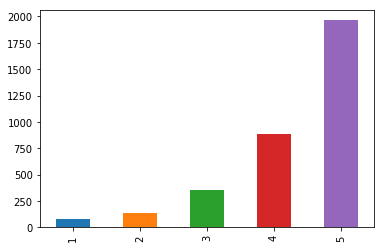

In [103]:
fig, ax = plt.subplots() # 사진 지정
sub_data['rating'].value_counts().sort_index().plot(ax = ax, kind = 'bar') # rating 변수만 꺼내서 value count
plt.show()

#### tips
- 전체 자료 대비 비중을 파악하고 싶을 때, y축은 상대도수로 표현

Text(0.5,1,'Rating distribution by gender for American Beauty (1999)')

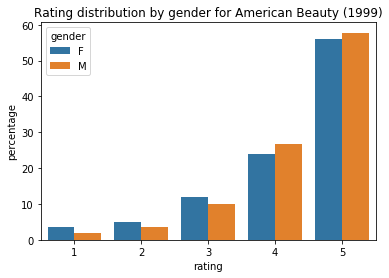

In [104]:
rating_counts = (sub_data.groupby(['gender'])['rating']
                 .value_counts(normalize = True) # count: 비율로, 표준화
                 .rename('percentage') # y축 label 'percentage'로 변경 
                 .mul(100) # 100 곱하기
                 .reset_index()
                 .sort_values('rating')) # rating 순서대로 sorting
sns.barplot(x= 'rating', y = 'percentage', hue = 'gender', data = rating_counts)
plt.title('Rating distribution by gender for ' + sub_data['title'][0])
plt.show()

### 1.3. 요약 통계량 계산

In [105]:
pd.pivot_table(sub_data, values = 'rating',
              index = 'gender',
              aggfunc = [len, np.mean, np.median, np.std],
               fill_value = 0) # 남/녀 평균, sd 차이 거의 없음. 단, 평가한 횟수 자체는 차이가 큼.
# aggfunc에 여러 개 넣고 싶으면 리스트로 묶기

,len,mean,median,std
,rating,rating,rating,rating
gender,,,,
F,946,4.238901,5,1.063093
M,2482,4.347301,5,0.937943


### 1.4. 실습
평가된 건수가 300개 이상인 영화 중 분산이 가장 큰 영화를 선택하여 아래를 확인

- 해당 영화의 평점 분포
- 성별 평점 분포

In [106]:
counts = data['title'].value_counts()
sel_titles = counts.index[counts >= 300]
sd_ratings = pd.pivot_table(data, values = 'rating', index = 'title', 
                             columns = 'gender', aggfunc = np.std)
sd_ratings = sd_ratings.loc[sel_titles]

In [107]:
# data['title] = data.title
sub_data2 = data.loc[data.title == sd_ratings.index[0]].reset_index()
sub_data2

,index,Unnamed: 0,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,107009,107009,2,2858,4,978298434,M,56,16,70072,American Beauty (1999),Comedy|Drama
1,107010,107010,3,2858,4,978297039,M,25,15,55117,American Beauty (1999),Comedy|Drama
2,107011,107011,5,2858,4,978241390,M,25,20,55455,American Beauty (1999),Comedy|Drama
3,107012,107012,6,2858,1,978236809,F,50,9,55117,American Beauty (1999),Comedy|Drama
4,107013,107013,8,2858,5,978229817,M,25,12,11413,American Beauty (1999),Comedy|Drama
5,107014,107014,9,2858,4,978225333,M,25,17,61614,American Beauty (1999),Comedy|Drama
6,107015,107015,10,2858,3,978224627,F,35,1,95370,American Beauty (1999),Comedy|Drama
7,107016,107016,11,2858,5,978219634,F,25,1,04093,American Beauty (1999),Comedy|Drama
8,107017,107017,14,2858,3,978200645,M,35,0,60126,American Beauty (1999),Comedy|Drama
9,107018,107018,15,2858,4,978196348,M,25,7,22903,American Beauty (1999),Comedy|Drama


### 1.5. 자료 내 영화의 장르 분포 살펴보기

In [108]:
# 장르 추출하기
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s)) # list 형태를 set으로 받아옴.
genre_labels

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [109]:
# 장르별 영화 수 추출하기
keyword_count = dict() # dict는 counting 할 때 편리
for s in genre_labels: keyword_count[s] = 0 # 장르명이 key, value는 0으로 설정
for liste_keywords in movies['genres'].str.split('|'):
    if type(liste_keywords) == float and pd.isnull(liste_keywords): # list의 키워드가 없거나 이상하면 continue
        continue
    for s in liste_keywords:
        if pd.notnull(s): keyword_count[s] += 1 # value 값에 하나씩 더한다
keyword_count

{'Action': 503,
 'Adventure': 283,
 'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Crime': 211,
 'Documentary': 127,
 'Drama': 1603,
 'Fantasy': 68,
 'Film-Noir': 44,
 'Horror': 343,
 'Musical': 114,
 'Mystery': 106,
 'Romance': 471,
 'Sci-Fi': 276,
 'Thriller': 492,
 'War': 143,
 'Western': 68}

In [110]:
# 위의 데이터를 딕셔너리로 만들자
keyword_occurences = [] # 빈 list 생성
for k, v in keyword_count.items():
    keyword_occurences.append([k, v]) # list append
keyword_occurences.sort(key = lambda x:x[1], reverse = True) # value 값을 기준으로 내림차순 정렬
keyword_occurences

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471],
 ['Horror', 343],
 ['Adventure', 283],
 ['Sci-Fi', 276],
 ["Children's", 251],
 ['Crime', 211],
 ['War', 143],
 ['Documentary', 127],
 ['Musical', 114],
 ['Mystery', 106],
 ['Animation', 105],
 ['Fantasy', 68],
 ['Western', 68],
 ['Film-Noir', 44]]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

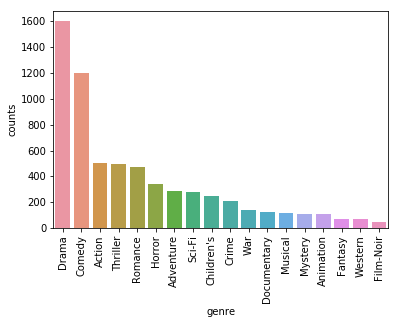

In [111]:
# 위의 데이터를 barplot으로 시각화
df = pd.DataFrame(keyword_occurences, columns = ['genre', 'counts'])
sns.barplot(x = 'genre', y = 'counts', data = df)
plt.xticks(rotation = 90) # 가독성 높이기 위해 x축 label을 90도 회전
plt.show()

### 1.6. 사용자의 나이 분포 살펴보기

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,index,percentage
0,1,3.675497
1,56,6.291391
2,50,8.211921
3,45,9.105960
4,18,18.261589
5,35,19.751656
6,25,34.701987


Text(0.5,0,'Age')

Text(0.5,1,'Distribution by Age')

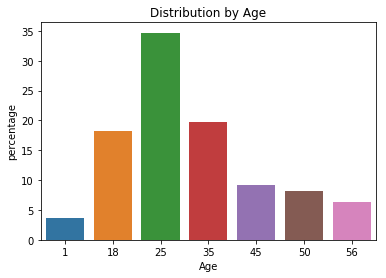

In [112]:
# 사용자의 나이 분포 barplot으로 시각화
users.head()
age_counts = (users['age'].
              value_counts(normalize=True).
              rename('percentage').
              mul(100).
              sort_values('index').
              reset_index())
age_counts # age는 범주형으로 분석하자
sns.barplot(x='index', y='percentage', data=age_counts)
plt.xlabel('Age')
plt.title('Distribution by Age')
plt.show()

Text(0.5,0,'Age')

Text(0.5,1,'Distribution by Age')

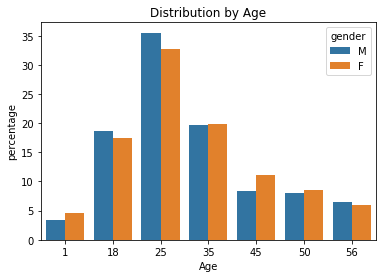

In [113]:
# 사용자의 성별 나이 분포 barplot으로 시각화
age_counts_by_sex = (users.groupby(['gender'])['age'].
                     value_counts(normalize=True).
                     rename('percentage').
                     mul(100).
                     sort_values().
                     reset_index())
sns.barplot(x='age', y='percentage', hue='gender', data=age_counts_by_sex)
plt.xlabel('Age')
plt.title('Distribution by Age')
plt.show()

### 1.7. 사용자의 나이/직업에 대한 이차원 분할표

In [114]:
### ...로 보이는 게 싫으면 margin 변경
pd.set_option('display.max_columns', 30)
pd.crosstab(users['age'], users['occupation'], margins = True)

occupation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
age,,,,,,,,,,,,,,,,,,,,,,
1,27,4,3,0,3,0,0,2,1,0,163,1,1,1,2,0,0,2,0,12,0,222
18,106,45,44,18,534,18,9,17,1,6,29,7,59,0,37,14,18,52,10,30,49,1103
25,298,156,113,68,200,52,76,253,6,29,1,51,181,0,133,73,58,202,23,15,108,2096
35,135,118,47,42,14,25,59,214,3,35,1,31,86,5,70,25,58,132,16,9,68,1193
45,66,80,30,17,3,10,31,74,1,11,0,17,32,7,26,17,38,57,9,2,22,550
50,46,70,18,16,5,6,40,80,2,7,0,16,22,27,19,8,45,35,9,2,23,496
56,33,55,12,12,0,1,21,39,3,4,1,6,7,102,15,7,24,22,3,2,11,380
All,711,528,267,173,759,112,236,679,17,92,195,129,388,142,302,144,241,502,70,72,281,6040


## 2. 확률분포
- Python에서 대부분의 확률 분포는 scipy.stats 라이브러리를 사용

### 2.1. 이항분포

In [115]:
from scipy.stats import binom

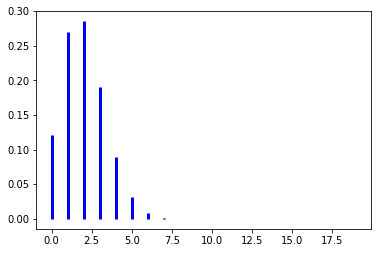

In [116]:
n, p = 20, 0.1
rv = binom(n, p)
x = np.arange(0, n) # 0부터 n-1까지의 어레이
fig, ax = plt.subplots()
ax.vlines(x, 0, rv.pmf(x), colors ='b', linestyles ='-', lw = 3)
plt.show()

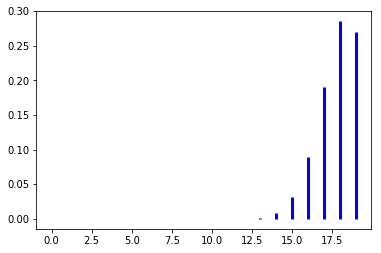

In [117]:
n, p = 20, 0.9
rv = binom(n, p)
x = np.arange(0, n)
fig, ax = plt.subplots()
ax.vlines(x, 0, rv.pmf(x), colors ='b', linestyles ='-', lw = 3)
plt.show()

In [118]:
# cdf : 누적 분포 함수
n, p = 20, 0.9
binom.cdf(k = 15, n = n, p = p) # 누적 함수 계산: 15보다 작을 확률을 다 더한 값

0.043174495284463356

In [119]:
n, p = 20, 0.9
binom.cdf(k = 19, n = n, p = p) # p-value 계산 시 주로 사용

0.8784233454094307

In [120]:
binom.cdf(k = 6, n = 30, p = 0.1)
1 - binom.cdf(k = 7, n = 30, p = 0.1)

0.9741732113380902

0.007783619237921258

In [121]:
np.random.seed(1)
binom.rvs(n = 30, p = 0.1, size = 10)
binom.rvs(n = 30, p = 0.1, size = 10, random_state = 1)

array([3, 4, 0, 2, 1, 1, 2, 2, 2, 3])

array([3, 4, 0, 2, 1, 1, 2, 2, 2, 3])

### 2.2. 균등분포

In [122]:
from scipy.stats import uniform

(array([0.96621369, 1.0042221 , 1.05223272, 0.97221502, 0.96821413,
        1.04023006, 0.99822077, 1.00022121, 1.02422652, 0.9762159 ]),
 array([9.69506877e-05, 1.00074834e-01, 2.00052718e-01, 3.00030602e-01,
        4.00008485e-01, 4.99986369e-01, 5.99964253e-01, 6.99942137e-01,
        7.99920020e-01, 8.99897904e-01, 9.99875788e-01]),
 <a list of 10 Patch objects>)

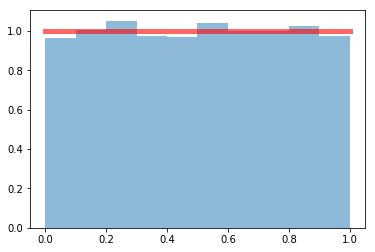

In [123]:
# pdf : 확률 분포 함수
x = np.linspace(0, 1, 1000) # 1000개의 sequence 생성
fig, ax = plt.subplots() # plot 하나 그릴거야
ax.plot(x, uniform.pdf(x), 'r-', lw= 5, alpha = 0.6, label = 'uniform pdf')

r = uniform.rvs(size = 5000)
ax.hist(r, alpha = 0.5, normed = True) # normalization 설정
plt.show()

In [124]:
u = uniform(loc = 5, scale = 5)
print('mean = ', u.mean())
print('var = ', u.var())
print('prob = ', 1-u.cdf(x = 8)) # 8년 이상의 수명을 가질 확률

mean =  7.5
var =  2.083333333333333
prob =  0.4


In [125]:
uniform.rvs(loc = 5, scale = 5, size = 10) # R과 마찬가지로 난수 생성 방식이 거의 동일함.

array([8.86465509, 7.99074382, 5.0727166 , 5.2101211 , 5.90485329,
       9.86015335, 6.27300094, 8.75504413, 6.40617605, 6.27759309])

### 2.3. 정규분포

In [126]:
from scipy.stats import norm

In [127]:
# 0부터 1까지 중에 0.3보다 작을 확률 = 0.3
loc, scale = 0, 1
norm.pdf(0.3, loc, scale)

0.38138781546052414

(array([0.00819562, 0.0327825 , 0.08359537, 0.18030374, 0.31471198,
        0.41142035, 0.33438148, 0.15571687, 0.08851274, 0.02950425]),
 array([-3.25303423, -2.6429526 , -2.03287096, -1.42278933, -0.81270769,
        -0.20262606,  0.40745558,  1.01753721,  1.62761885,  2.23770048,
         2.84778212]),
 <a list of 10 Patch objects>)

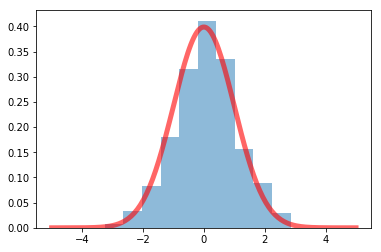

In [128]:
x = np.linspace(-5, 5, 200)
fig, ax = plt.subplots()
ax.plot(x, norm.pdf(x), 'r-', lw = 5, alpha = 0.6, label = 'norm pdf')

r = norm.rvs(size = 1000)
ax.hist(r, alpha = 0.5, normed = True)
plt.show()

In [129]:
# 정규분포의 확률밀도함수 및 분위수
normal = norm(loc = 0, scale = 1)
normal.pdf(0)

0.3989422804014327

In [130]:
normal.cdf(1) # pnorm
normal.ppf(0.5) # qnorm
# qqplot 그릴 때 normal.ppf 활용

normal.rvs(size = 10)

0.8413447460685429

0.0

array([-0.07171323,  0.44552528, -0.1218591 ,  0.19084898, -2.27215913,
       -2.91449892,  0.39093519, -1.16573849,  0.81185647, -0.96284878])

## 3. 분포에 관한 추론

### 3.1. 모평균(모분산을 알 때 / 모를 때) 추론, 신뢰구간, t-test

In [131]:
iris = pd.read_csv('Iris.csv')
iris = iris.drop('Id', axis=1) # 변수 하나에 대해서만 진행!
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [132]:
# 점추정 : 주어진 iris 자료에 대해 각 종에 대해 변수들의 점 추정

# 평균, 분산, 신뢰구간
iris.groupby('Species').mean()
iris.groupby('Species').var()

import numpy
import scipy
# setosa 종 SepalLengthCm의 유의수준 90% 신뢰구간
alpha = 0.01 
X = iris.loc[iris['Species'] == 'Iris-setosa']['SepalLengthCm']
Xbar = X.mean()
sigma = S = X.std()
n = len(X)
z0 = norm.ppf(1-alpha/2) # z값

# 모분산을 알 때
ci1 = [Xbar-z0*sigma/np.sqrt(n), Xbar+z0*sigma/np.sqrt(n)]
ci1

# 모분산을 모를 때 : 자료가 정규분포 따르는 지 확인 
# log를 취해보는 것도 한 방법
from scipy.stats import t
t0 = t.ppf(1-alpha/2, df = n-1) # t값
ci2 = [Xbar-t0*S/np.sqrt(n), Xbar+t0*S/np.sqrt(n)]
ci2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


[4.877596017789616, 5.134403982210383]

[4.872405547497749, 5.13959445250225]

In [133]:
T = (Xbar-6)/(S/np.sqrt(n))
T
t.cdf(T, df = n-1)

-19.939991608146176

1.838681319441873e-25

In [134]:
from scipy import stats
stats.ttest_1samp(X, 6)

Ttest_1sampResult(statistic=-19.939991608146148, pvalue=3.6773626388839824e-25)

In [135]:
X = np.concatenate([X, [20]], axis=0)
stats.ttest_1samp(X, 6)

Ttest_1sampResult(statistic=-2.348735040695466, pvalue=0.022831164451641545)

In [136]:
# robust statistics : 평균 대신 중앙값 사용

In [137]:
# 독립 이표본의 평균 비교
# 표본들이 정규성을 따르고, 행 별로 다 독립일 때
X1 = iris.loc[iris['Species'] == 'Iris-setosa']['SepalLengthCm']
X2 = iris.loc[iris['Species'] == 'Iris-versicolor']['SepalLengthCm']

X1bar = X1.mean()
X2bar = X2.mean()
sigma1 = sigma2 = 0.2
n1 = len(X1); n2 = len(X2)
# 검정통계량
z0 = (X1bar-X2bar)/np.sqrt(sigma1**2/n1 + sigma2**2/n2)
z0
# 2*norm.cdf(z0)

-23.250000000000014

In [138]:
stats.ttest_ind(X1, X2, equal_var = True) # 모집단이 같다는 조금 더 센 가정
stats.ttest_ind(X1, X2, equal_var = False)

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487077e-18)

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

### 3.2. 실습
- versicolor의 PetalLengthCm 모평균에 대한 95% 신뢰구간 계산
- versicolor의 PetalLengthCm 모평균에 대한 유의성 검정
- versicolor와 virginica의 PetalLengthCm 모평균 비교

In [139]:
from scipy import stats
alpha = 0.05
X = iris.loc[iris['Species'] == 'Iris-versicolor']['PetalLengthCm']
Xbar = X.mean()
sigma = S = X.std()
n = len(X)
z0 = norm.ppf(1-alpha/2)

t0 = t.ppf(1-alpha/2, df = n-1)
ci3 = [Xbar - t0*S/np.sqrt(n), Xbar + t0*S/np.sqrt(n)]
ci3

stats.ttest_1samp(X, 5)

[4.126452778080923, 4.393547221919077]

Ttest_1sampResult(statistic=-11.135279732161809, pvalue=5.030971033445435e-15)

In [140]:
X1 = iris.loc[iris['Species'] == 'Iris-virginica']['PetalLengthCm']
X2 = iris.loc[iris['Species'] == 'Iris-versicolor']['PetalLengthCm']
stats.ttest_ind(X1, X2, equal_var = False)

X1.std()
X2.std()

Ttest_indResult(statistic=12.603779441384987, pvalue=4.900287527398095e-22)

0.5518946956639835

0.46991097723995806

### 3.3. 모분산 추론 및 검정

In [141]:
# 모분산 검정 사전 세팅 : 바뀌지 않는 것
X = iris.loc[iris['Species'] == 'Iris-setosa']['SepalLengthCm']
n = len(X)
alpha = 0.05

S2 = X.var()
sigma2 = 0.2

# 검정 통계량
chi2 = (n-1)*S2/sigma2
chi2

# 유의확률
stats.chi2.cdf(chi2, df = n-1)

30.440999999999978

0.017283311607342287

### 3.4. 모분산비에 대한 추론(F-test)

In [142]:
# 두 모집단에서 분산을 비교할 때 분산의 비에 대한 검정
# t-test 경우에 '이분산'으로 가정하고 검정 진행하는 게 안전

X1 = iris.loc[iris['Species'] == 'Iris-setosa']['SepalLengthCm']
X2 = iris.loc[iris['Species'] == 'Iris-versicolor']['SepalLengthCm']

n1 = len(X1)
n2 = len(X2)

S_12 = X1.var()
S_22 = X2.var()

# 검정 통계량
F0 = S_12/S_22
F0

# 유의 확률
stats.f.cdf(F0, n1-1, n2-1)

0.4663429131686986

0.004328594181349908

### 3.5. Movie-Lens 실습

In [147]:
# 1. 자료에서 가장 많이 평가된 영화자료를 선택
movie_counts = data['title'].value_counts().sort_values(ascending=False)
sub_data = data.loc[data['title'] == movie_counts.index[0]].reset_index()
sub_data.shape
sub_data.head()

(3428, 12)

,index,Unnamed: 0,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,107009,107009,2,2858,4,978298434,M,56,16,70072,American Beauty (1999),Comedy|Drama
1,107010,107010,3,2858,4,978297039,M,25,15,55117,American Beauty (1999),Comedy|Drama
2,107011,107011,5,2858,4,978241390,M,25,20,55455,American Beauty (1999),Comedy|Drama
3,107012,107012,6,2858,1,978236809,F,50,9,55117,American Beauty (1999),Comedy|Drama
4,107013,107013,8,2858,5,978229817,M,25,12,11413,American Beauty (1999),Comedy|Drama


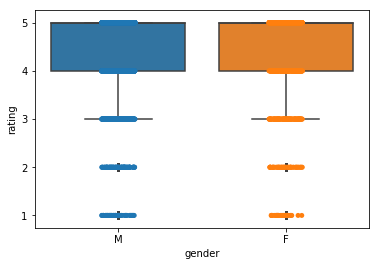

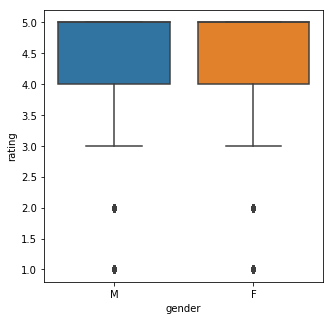

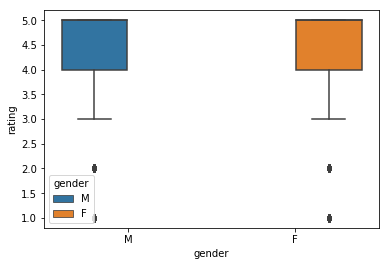

In [150]:
# 2. x축에는 성별, y축에는 각 영화의 평점들의 boxplot 그리기 (timestamp 무시)
sns.boxplot(x = 'gender', # 범주형 변수
           y = 'rating', # 연속형 변수
            data = sub_data)
sns.stripplot(x = 'gender', # 범주형 변수
           y = 'rating', # 연속형 변수
            data = sub_data,
             jitter = True)
plt.show()

fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(x = 'gender', y = 'rating', data = sub_data)
plt.show()

sns.boxplot(x = 'gender', y = 'rating', hue = 'gender',
           data = sub_data)

In [152]:
# 3. 평점 자료가 정규 분포를 따른다는 가정 하에, 성별마다 평점의 평균의 차이가 있는지 유의수준 5%의 검정 진행
X1 = sub_data.loc[sub_data['gender'] == 'M']['rating']
X2 = sub_data.loc[sub_data['gender'] == 'F']['rating']
stats.ttest_ind(X1, X2, equal_var = False)

Ttest_indResult(statistic=2.7541365521065426, pvalue=0.0059540480808636075)

In [154]:
# 4. 성별마다 평점의 분산의 차이가 있는지 검정하시오
X1 = sub_data.loc[sub_data['gender'] == 'M']['rating']
X2 = sub_data.loc[sub_data['gender'] == 'F']['rating']

n1 = len(X1)
n2 = len(X2)

S_12 = X1.var()
S_22 = X2.var()

# 검정 통계량
F0 = S_12/S_22
F0

# 유의 확률
stats.f.cdf(F0, n1-1, n2-1) # 영가설 기각: 이분산으로 판단
stats.f_oneway(X1,X2)

0.7784126030747368

1.1551976221590845e-06

F_onewayResult(statistic=8.482604221336151, pvalue=0.003608759783434126)